<a href="https://colab.research.google.com/github/Mwadz/Hass-Consulting-Company-w7/blob/main/Regression_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company

# Question Definition

**a) Objective**

To create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

**b) Success Metric**

Delivering a high accuracy prediction model.

**c) The context**

* I am a Data Scientist working for Hass Consulting Company which is a real estate leader with over 25 years of experience.
* I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

**d) Experimental Design**

The process will entail:

    i) Reading and exploring the given dataset.

    ii) Defining the appropriateness of the available data to answer the given question.

    iii) Finding and deciding what to do with outliers, anomalies, and missing data within the dataset.

    iv) Performing exploratory data analysis while recording the observations.

    v) Performing regression analysis. Incorporating categorical independent variables into the models(depending on whether necessary). 

    vi) Checking for multicollinearity.

    vii) Providing a recommendation based on the analysis. 

    viii) Createing residual plots for the models, and assess heteroskedasticity.

    ix) Challenge the solution by providing insights on how we can make improvements in model improvement.

**e) Data Relevance**
The appropriate dataset to use for this project is that which contains data with information on real estate properties collected over the past few months. The data provided is useful and very relevant.

In [47]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [48]:
# let's load the dataset
estate = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [49]:
# Previwing the dataset
print(estate.shape)
estate.head()

(21613, 20)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
estate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [51]:
estate.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# A) Data Cleaning

In [52]:
estate.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
# checking for duplictes
estate.duplicated().sum()

3

In [54]:
# dropping the duplicates
estate.drop_duplicates(keep=False, inplace=True)
# confirming
estate.duplicated().sum()

0

In [55]:
estate.drop(['id'], axis=1, inplace=True)


In [57]:
estate.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# B) EDA

## Descriptive Analysis

In [59]:
# setting our y as rank

y= estate['price']

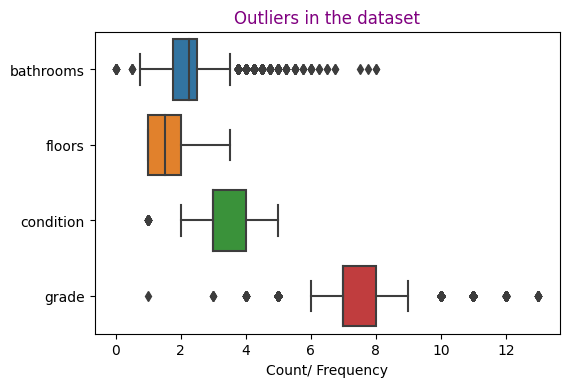

In [88]:
# checking for outliers
col = estate[['bathrooms','floors',	'condition',	'grade']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Outliers in the dataset', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

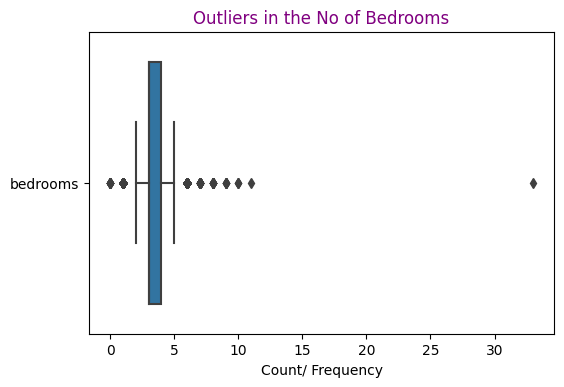

In [87]:
# checking for outliers
col = estate[['bedrooms']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Outliers in the No of Bedrooms', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

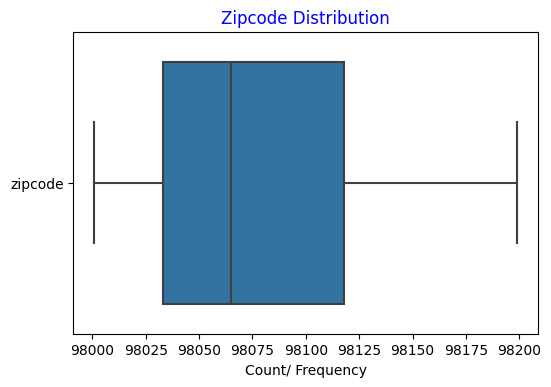

In [108]:
	# checking for outliers
col = estate[['zipcode']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Zipcode Distribution', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

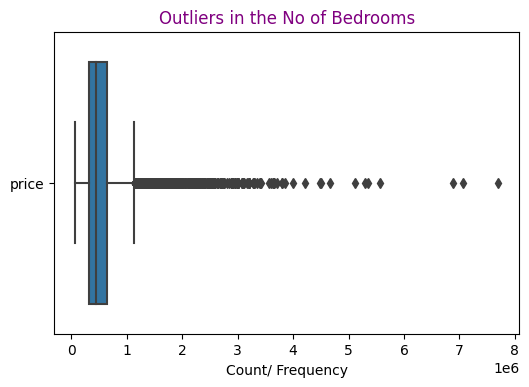

In [95]:
# checking for outliers
col = estate[['price']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Outliers in the No of Bedrooms', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

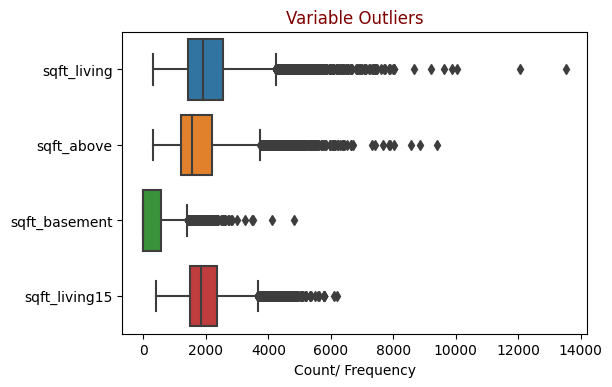

In [85]:
# checking for outliers
col = estate[['sqft_living','sqft_above',	'sqft_basement','sqft_living15']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Variable Outliers', color = 'maroon')
plt.xlabel('Count/ Frequency')
plt.show()

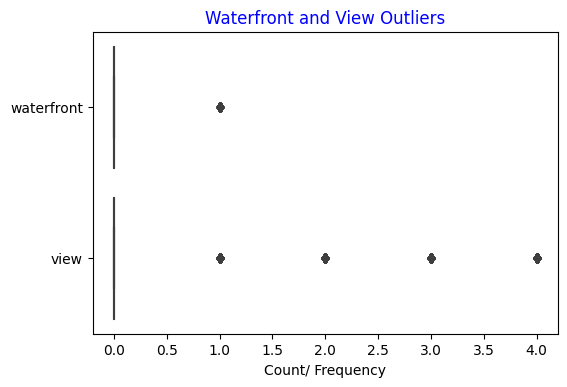

In [80]:
	# checking for outliers
col = estate[['waterfront', 'view']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Waterfront and View Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()
  

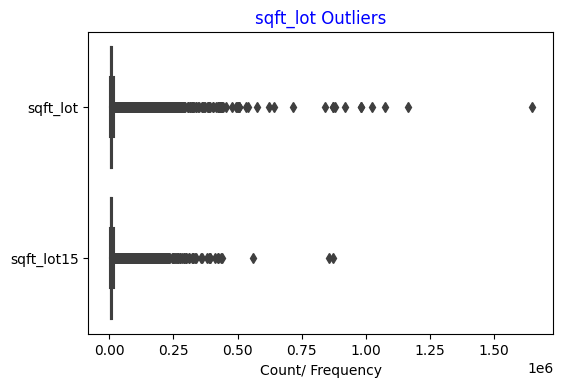

In [107]:
	# checking for outliers
col = estate[['sqft_lot','sqft_lot15',]]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('sqft_lot Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

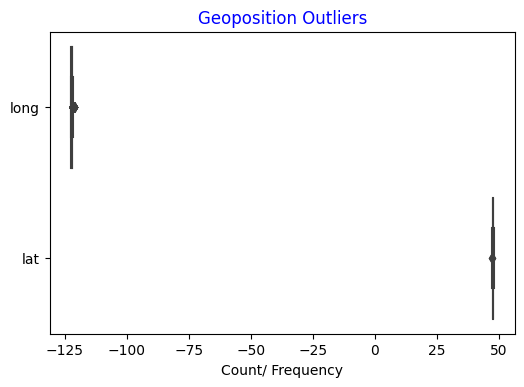

In [106]:
# checking for outliers in geographical positioning
col = estate[['long','lat']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Geoposition Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()
  

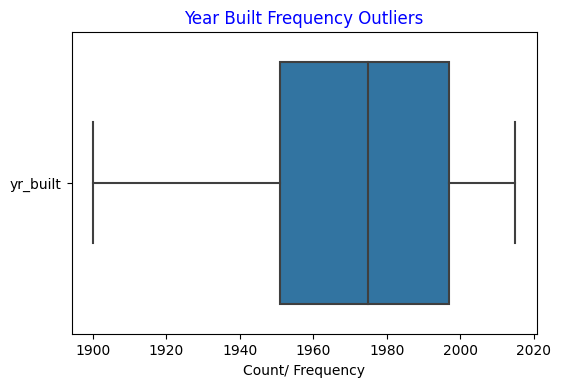

In [105]:
	# checking for outliers
col = estate[['yr_built']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Year Built Frequency Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()
  

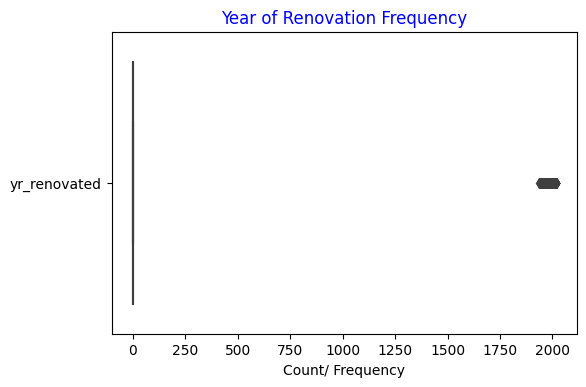

In [104]:

	# checking for outliers
col = estate[['yr_renovated']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Year of Renovation Frequency', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [111]:
# getting descriptive statistics
estate.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,47.560045,-122.213923,1986.484889,12769.608460
std,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,0.138580,0.140837,685.460263,27307.765664
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Univariate Analysis

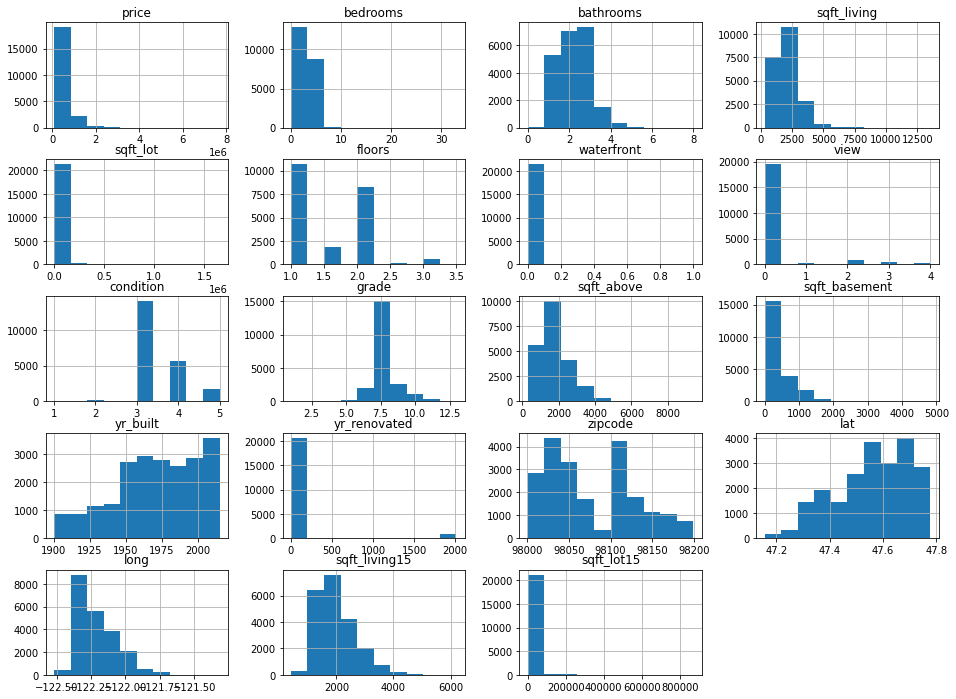

In [112]:
# plotting the histogram for every variable
estate.hist(bins=10, figsize=(16,12))
plt.show()

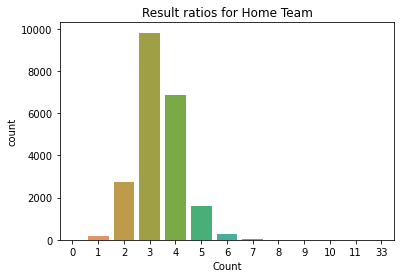

In [113]:
%matplotlib inline
sns.countplot(data=estate, x='bedrooms')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

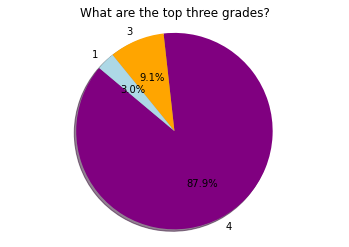

In [146]:
# finding out what proportion makes up the top 3 most frequent grades
gradedf = estate[estate['grade'] < 5]
plt.pie(gradedf['grade'].value_counts(normalize=True), labels =gradedf['grade'].value_counts().index,colors = ['purple', 'orange','lightblue'], autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('What are the top three grades?')
plt.show()

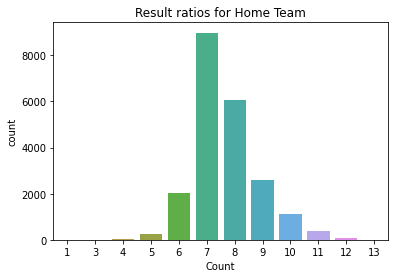

In [136]:
%matplotlib inline
sns.countplot(data=estate, x='grade')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

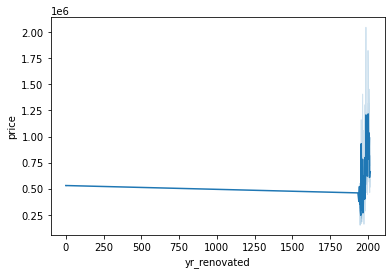

In [133]:
sns.lineplot(data=estate, x="yr_renovated", y="price");


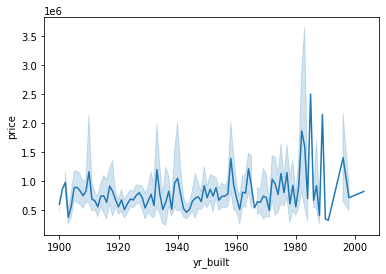

In [135]:
select = estate[estate['yr_renovated'] > 1900] # this selects recent data moreor less where we see activity in the previous graph
#plotting the graph of price per year renovated
sns.lineplot(data=select, x="yr_built", y="price");


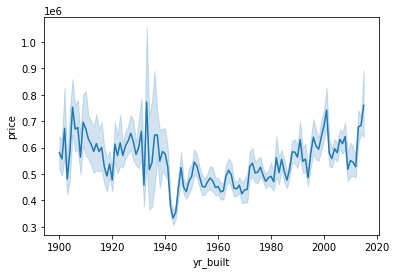

In [127]:
#checking the price per year built
sns.lineplot(data=estate, x="yr_built", y="price");

## Bivariate Analysis

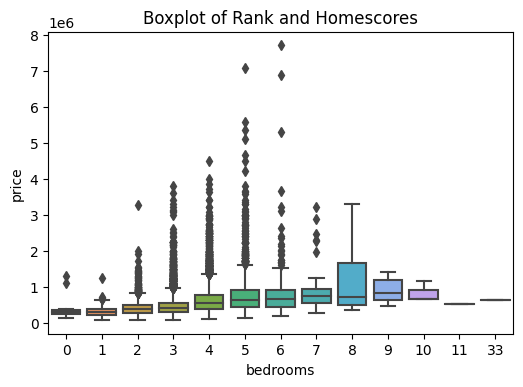

In [154]:
# prompting system to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# can add pallete to boxplot
plt.figure(dpi = 100)
sns.boxplot(estate['bedrooms'],y)
plt.title("Boxplot of Rank and Homescores")
plt.show()

<Figure size 600x400 with 0 Axes>

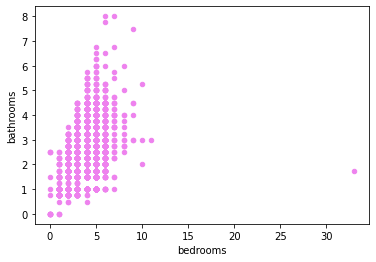

In [158]:
# plotting bedrooms against bathrooms
plt.figure(dpi = 100)
estate.plot(x = 'bedrooms', y = 'bathrooms', kind='scatter', color='violet')
plt.show()

In [ ]:
# observing the correlation
estate.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [160]:
# Installing heatmapz
!pip install heatmapz


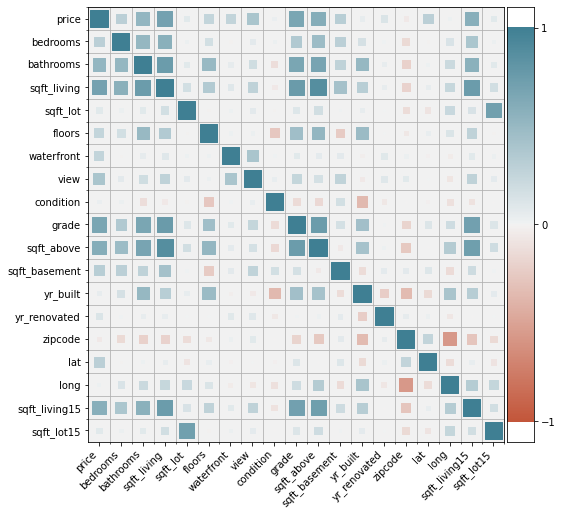

In [161]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(8, 8))
corrplot(estate.corr(), size_scale=300);

# Multicollinearity


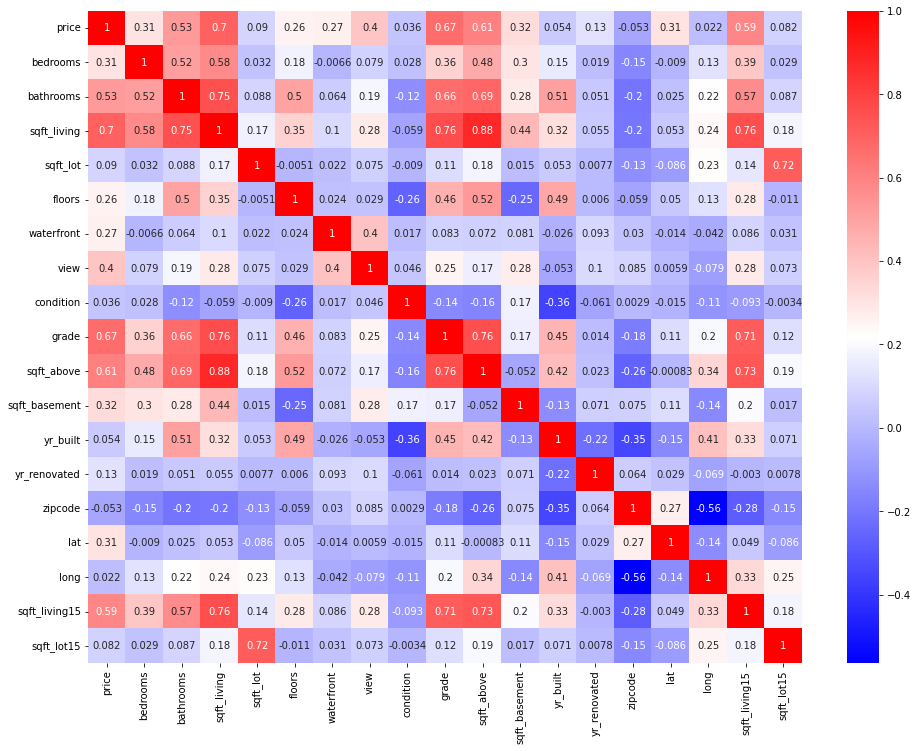

In [162]:
# plotting a correlation map
plt.figure(figsize=(16, 12))
sns.heatmap(estate.corr(), cmap='bwr', annot=True);

In [164]:
# importing VIF libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
